<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

                XGBoost 작동법 이해
                XGBoost 기본 예제 사용
                XGBoost 하이퍼파라미터
                XGBoost와 앙상블
        KNN
        
        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
iris = load_iris()

In [ ]:
X=iris.data
y=iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [ ]:
def knn_score(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return (accuracy_score(y_test, pred), pred)

In [ ]:
scores, prd = knn_score(5)

In [ ]:
scores

1.0

In [ ]:
confusion_matrix(y_test, prd)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]])

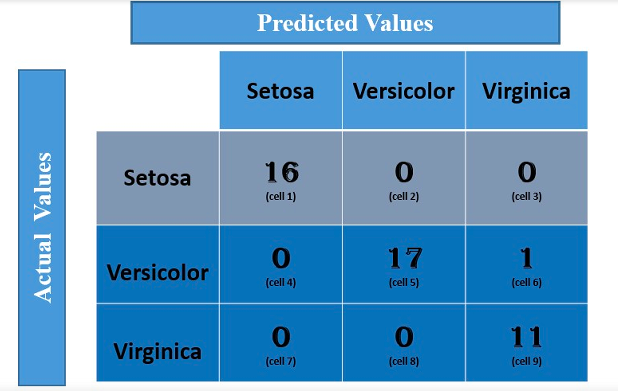

In [ ]:
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
scores=[]
for i in range(3, 90, 2):
    score, prd = knn_score(i)
    scores.append((i, score))

In [ ]:
scores

[(3, 1.0),
 (5, 1.0),
 (7, 1.0),
 (9, 1.0),
 (11, 1.0),
 (13, 1.0),
 (15, 1.0),
 (17, 1.0),
 (19, 1.0),
 (21, 1.0),
 (23, 1.0),
 (25, 0.9666666666666667),
 (27, 0.9666666666666667),
 (29, 0.9666666666666667),
 (31, 0.9666666666666667),
 (33, 0.9666666666666667),
 (35, 0.9666666666666667),
 (37, 0.9666666666666667),
 (39, 0.9666666666666667),
 (41, 0.9333333333333333),
 (43, 0.8666666666666667),
 (45, 0.8666666666666667),
 (47, 0.9),
 (49, 0.9),
 (51, 0.9),
 (53, 0.9),
 (55, 0.9),
 (57, 0.9),
 (59, 0.9),
 (61, 0.9333333333333333),
 (63, 0.8666666666666667),
 (65, 0.8666666666666667),
 (67, 0.8666666666666667),
 (69, 0.8666666666666667),
 (71, 0.8666666666666667),
 (73, 0.8666666666666667),
 (75, 0.9),
 (77, 0.6),
 (79, 0.5666666666666667),
 (81, 0.6),
 (83, 0.6),
 (85, 0.6),
 (87, 0.6),
 (89, 0.5666666666666667)]

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    test_size=0.2, random_state=156)

In [ ]:
train_acc = []
test_acc = []
k = range(3, 101, 2)
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train)) # train 데이터를 사용해 예측한 값과 y_train의 정확도
    test_acc.append(clf.score(X_test, y_test)) # test 데이터를 사용해 예측한 값과 y_test의 정확도

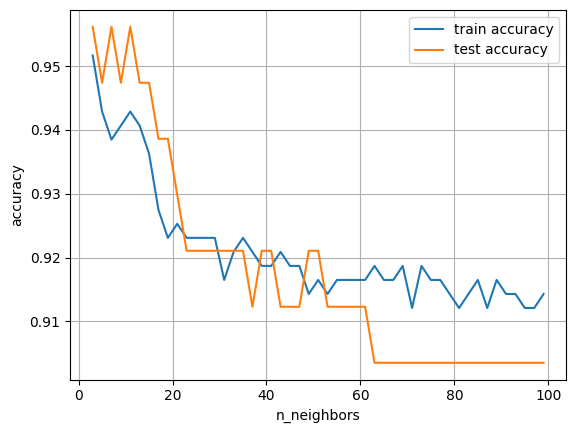

In [ ]:
plt.plot(k, train_acc, label='train accuracy')
plt.plot(k, test_acc, label='test accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors':range(1, 101)}

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5)

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101)}, scoring='accuracy')

In [ ]:
grid_cv.best_params_

{'n_neighbors': 10}

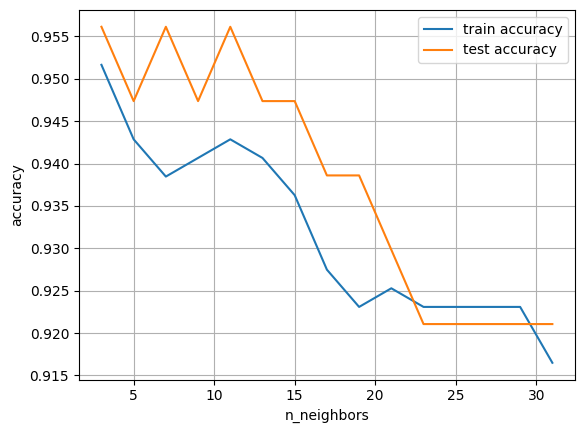

In [ ]:
plt.plot(k[:15], train_acc[:15], label='train accuracy')
plt.plot(k[:15], test_acc[:15], label='test accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.grid()
plt.show()

In [ ]:
grid_cv.best_score_

0.9318681318681319

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 101)}, scoring='accuracy')

In [ ]:
grid_cv.best_params_

{'n_neighbors': 4}

In [ ]:
pred = grid_cv.best_estimator_.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, pred)

0.9649122807017544

#데이터 정규화 예제

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
np.ones(35), np.zeros(14) # 1-도미, 0-빙어

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14) ))

In [ ]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36, 2), (13, 2), (36,), (13,))

In [ ]:
y_test

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_train

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

1.0

In [ ]:
df = pd.DataFrame(fish_data, columns=['length', 'weight'])

In [ ]:
df.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [ ]:
df['target'] = fish_target

In [ ]:
df.head()

,length,weight,target
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0


<Axes: xlabel='length', ylabel='weight'>

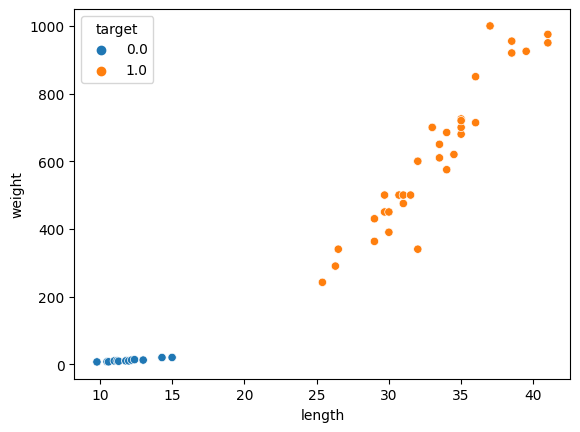

In [ ]:
import seaborn as sns
sns.scatterplot(x='length', y='weight', hue='target', data=df)

새로 잡은 물고기

길이 25

무게가 150

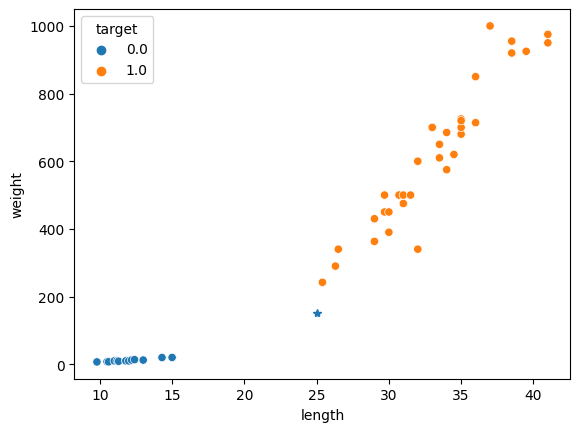

In [ ]:
sns.scatterplot(x='length', y='weight', hue='target', data=df)
plt.plot(25, 150, marker='*')

새로운 데이터를 AI에 적용 하기

    1. X_test 형식대로 만들어 줘야 한다.

    2. predict 메서드를 사용하여 AI 가 예측하게 한다.

In [ ]:
X_test

array([[ 11. ,   9.7],
       [ 11.8,   9.9],
       [ 29.7, 450. ],
       [ 11.8,  10. ],
       [ 26.5, 340. ],
       [ 12.4,  13.4],
       [ 34. , 685. ],
       [ 34. , 575. ],
       [ 38.5, 920. ],
       [ 35. , 680. ],
       [ 26.3, 290. ],
       [ 31. , 500. ],
       [ 41. , 950. ]])

In [ ]:
knn.predict([[25, 150]])

array([0.])

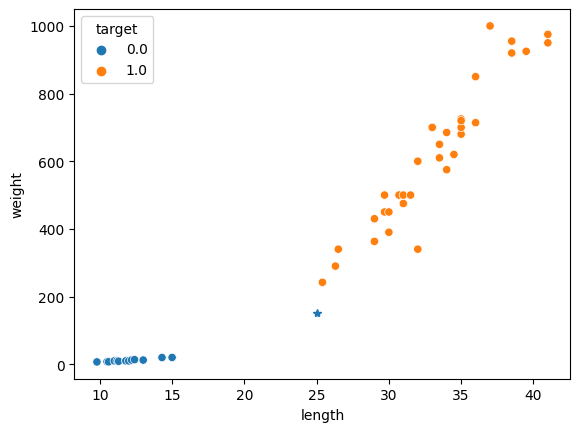

In [ ]:
sns.scatterplot(x='length', y='weight', hue='target', data=df)
plt.plot(25, 150, marker='*')

In [ ]:
dist, idx = knn.kneighbors([[25, 150]])

In [ ]:
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [ ]:
idx

array([[21, 33, 19, 30,  1]])

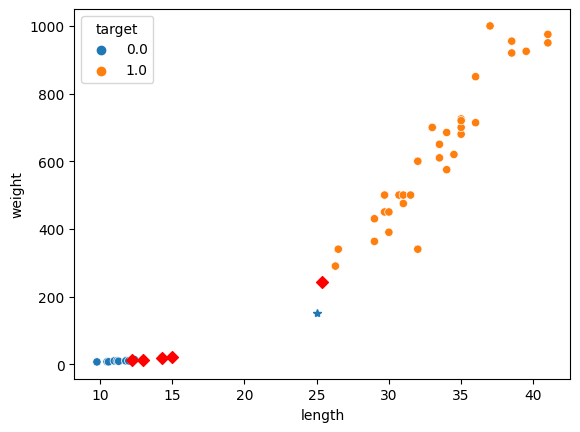

In [ ]:
sns.scatterplot(x='length', y='weight', hue='target', data=df)
plt.plot(25, 150, marker='*')
plt.scatter(X_train[idx, 0], X_train[idx, 1], marker='D', c='red')

In [ ]:
X_train[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [ ]:
dist.shape

(1, 5)

In [ ]:
X_train[idx].shape

(1, 5, 2)

In [ ]:
X_train[idx][0].shape

(5, 2)

In [ ]:
np.c_[dist.reshape(5,1), X_train[idx][0]]

array([[ 92.00086956,  25.4       , 242.        ],
       [130.48375378,  15.        ,  19.9       ],
       [130.73859415,  14.3       ,  19.7       ],
       [138.32150953,  13.        ,  12.2       ],
       [138.39320793,  12.2       ,  12.2       ]])

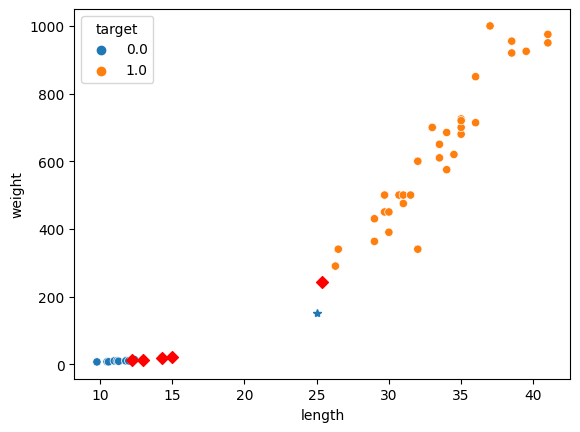

In [ ]:
sns.scatterplot(x='length', y='weight', hue='target', data=df)
plt.plot(25, 150, marker='*')
plt.scatter(X_train[idx, 0], X_train[idx, 1], marker='D', c='red')

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_sample = scaler.transform([[25, 150]])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [ ]:
knn.predict(X_sample)

array([1.])

In [ ]:
X_sample

array([[-0.23012627, -0.94060693]])

In [ ]:
X_sample[0]

array([-0.23012627, -0.94060693])

In [ ]:
X_sample[0][0]

-0.23012626562373972

In [ ]:
dist, idx

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]]))

In [ ]:
dist, idx = knn.kneighbors(X_sample)

In [ ]:
dist, idx

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]),
 array([[21, 14, 34, 32,  5]]))

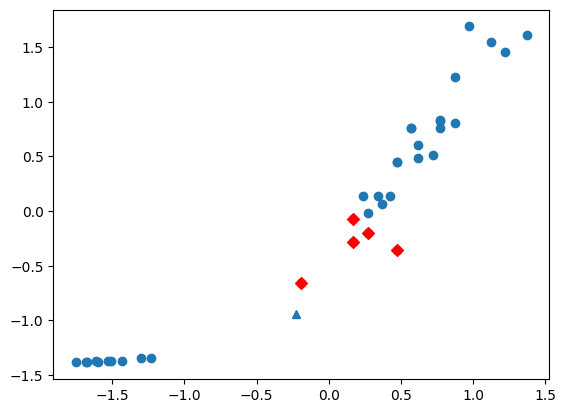

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.plot(X_sample[0][0], X_sample[0][1], marker='^')
plt.scatter(X_train[idx, 0], X_train[idx, 1], marker='D', c='red')

In [ ]:
ls ./drive/MyDrive/data/citr*

./drive/MyDrive/data/citrus.csv


In [ ]:
citrus = pd.read_csv('./drive/MyDrive/data/citrus.csv')

In [ ]:
citrus

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


red, blue, green 사용 하지 않습니다.!

오렌지 / 자몽 구분하기

1번 샘플 : [5.80, 114.58]

2번 샘플 : [11.50, 198.25]

In [ ]:
citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
citrus.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

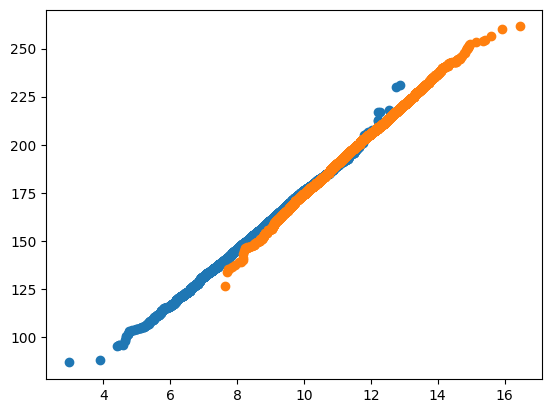

In [ ]:
plt.scatter(citrus[citrus.name=='orange'].diameter, citrus[citrus.name=='orange'].weight)
plt.scatter(citrus[citrus.name=='grapefruit'].diameter, citrus[citrus.name=='grapefruit'].weight)

In [ ]:
citrus['target'] = np.where(citrus.name=='orange', 0, 1)

In [ ]:
citrus

,name,diameter,weight,red,green,blue,target
0,orange,2.96,86.76,172,85,2,0
1,orange,3.91,88.05,166,78,3,0
2,orange,4.42,95.17,156,81,2,0
3,orange,4.47,95.60,163,81,4,0
4,orange,4.48,95.76,161,72,9,0
...,...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20,1
9996,grapefruit,15.41,254.67,148,68,7,1
9997,grapefruit,15.59,256.50,168,82,20,1
9998,grapefruit,15.92,260.14,142,72,11,1


In [ ]:
citrus.drop(['red', 'green', 'blue'], axis=1, inplace=True)

In [ ]:
citrus

,name,diameter,weight,target
0,orange,2.96,86.76,0
1,orange,3.91,88.05,0
2,orange,4.42,95.17,0
3,orange,4.47,95.60,0
4,orange,4.48,95.76,0
...,...,...,...,...
9995,grapefruit,15.35,253.89,1
9996,grapefruit,15.41,254.67,1
9997,grapefruit,15.59,256.50,1
9998,grapefruit,15.92,260.14,1


In [ ]:
X_features = citrus.loc[:, ['diameter', 'weight']]
y_label = citrus['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.978

In [ ]:
knn.score(X_test, y_test)

0.9676

In [ ]:
X_test[:5]

,diameter,weight
9462,13.03,221.14
4268,9.78,172.97
756,7.18,133.74
5587,10.00,174.44
6465,10.81,186.97


In [ ]:
knn.predict([[5.80, 114.58]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
knn.predict([[11.50, 198.25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

#SVM (Support Vector Machine)

SVM : 주로 분류에 사용되는 기계학습 알고리즘

데이터를 좌표계(n차원 공간)에 하나의 점으로 표시

n 차원 공간상의 데이터 집단을 구분하는 평면(Hyper Plane)을 찾아서 분류를 수행

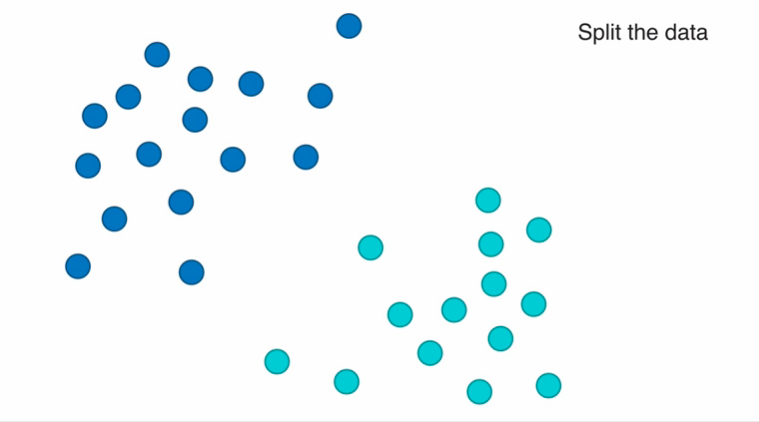

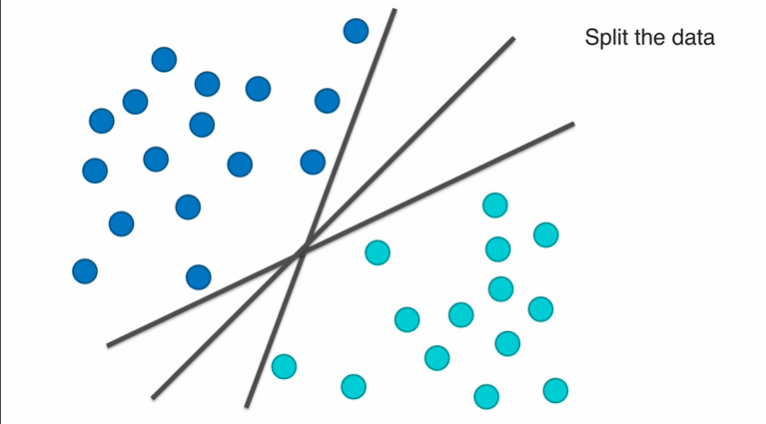

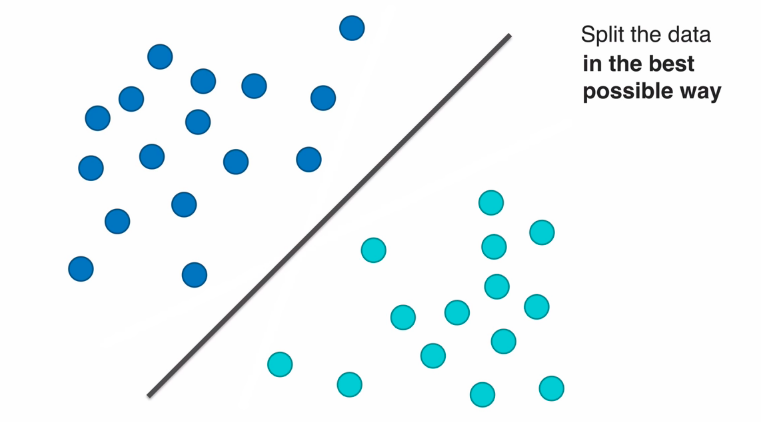

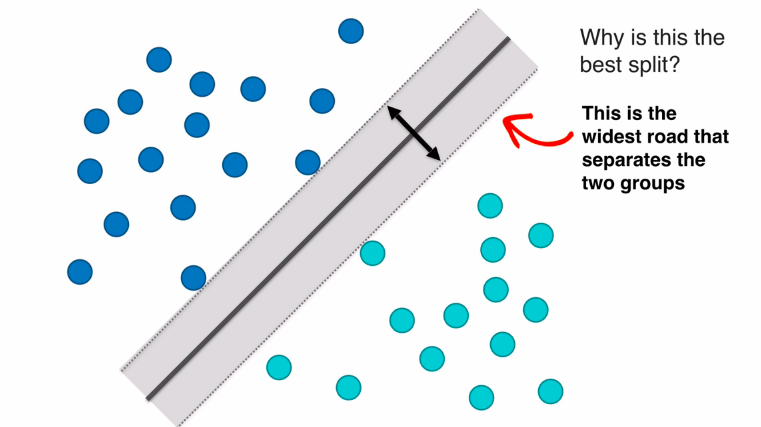

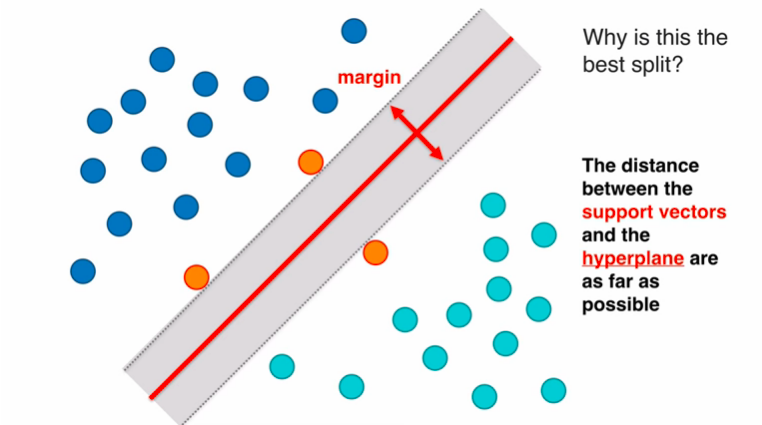

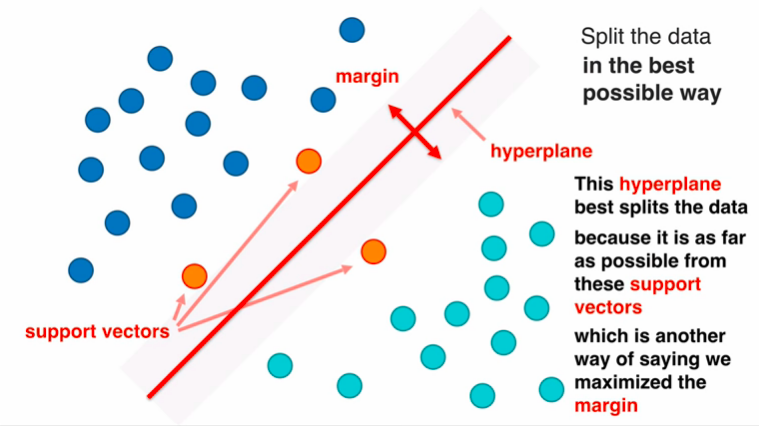

그래프에서 생각해 보기

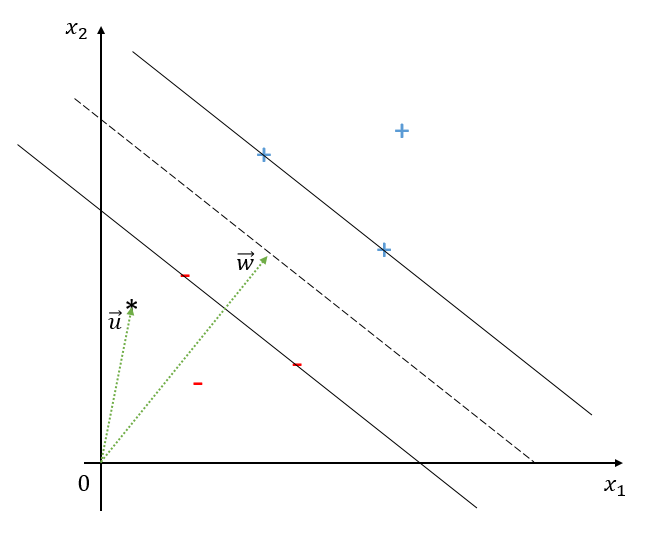

조건 1) 점선 아래에 있으면 -, 위에 있으면 +

그림에서 점선 라인보다 아래에 있으면 - 가 되고, 점선 보다 위에 있으면 + 가 된다. 즉,

$$\vec{w} \cdot \vec{u} \ge c\ \Rightarrow\ +$$
$$\vec{w} \cdot \vec{u} \le c\ \Rightarrow\ -$$

만약, w를 단위벡터로 고치기 위해 w/|w|를 한 경우에도

|w|를 오른쪽으로 이항하면, 또 다른 상수 C' 이 되어 위 식은 성립한다.

b = -c 라 하면

$$\vec{w} \cdot \vec{u} + b \ge 0$$

점선으로 부터 support vector로 부터의 거리를 dx 라 하면, - 쪽 실선은 -dx 만큼 떨어져 있으며, + 쪽 실선은 dx 만큼 올라가져 있다. 따라서,

$$\vec{w} \cdot \vec{x}_+ + b \ge +dx$$
$$\vec{w} \cdot \vec{x}_- + b \le -dx$$

$$\vec{w} \cdot \vec{x}_+ + b \ge +1$$
$$\vec{w} \cdot \vec{x}_- + b \le -1$$

위 두식을 하나로 나타내기 위해, 다음과 같은 y를 생각해보자

$$y_i=
\begin{cases}
+1, & \mbox{for }x_+  \\
-1, & \mbox{for }x_-
\end{cases}$$

그러면, 위에 식은

$$y_i (\vec{w} \cdot \vec{x_i} + b) \ge 1$$

그러면 실선위의 점들은

$$y_i (\vec{w} \cdot \vec{x_i} +b ) -1 =0 \quad \cdot \cdot \cdot (1)$$

두 실선의 거리를 생각하기 위해선, 실선 위의 점들간의 거리를 생각해야 한다.


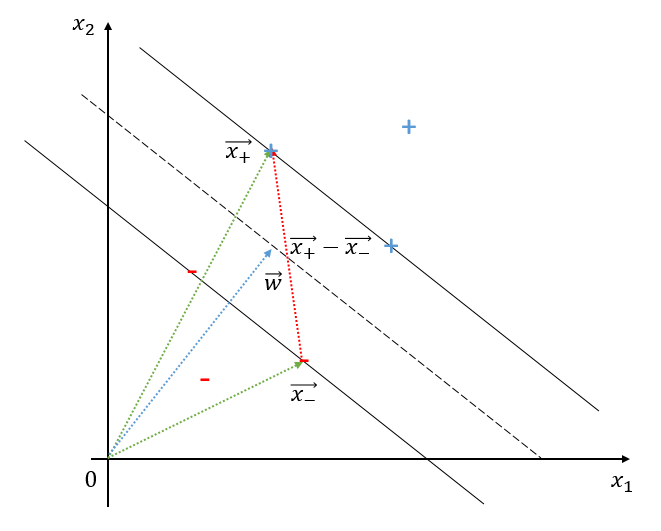

위 그림에서 빨간색 벡터를 벡터 w 에 정사영 시켰을때의 길이가 두 실선 사이의 거리가 되므로,

$${\vec{w} \over |\vec{w}| } \cdot ( \vec{x}_+ - \vec{x}_-) $$

식(1)로 부터 (+ 일때 1, - 일때 -1)
$$ \vec{w} \cdot \vec{x}_+  = 1 - b \\ \vec{w} \cdot \vec{x}_- = -1 -b$$  

이므로,

$${\vec{w} \over |\vec{w}| } \cdot ( \vec{x}_+ - \vec{x}_-) =  {1 \over |\vec{w}|}(\vec{w} \cdot \vec{x}_+ - \vec{w} \cdot \vec{x}_-) = {2 \over |\vec{w}|} \quad : \quad margin $$

이 거리를 최대화 하는 것이므로, 역수를 취할 경우에는 최소화 하는 것이고

 $$ min\ \left( \ {1 \over 2}|\vec{w}|\ \right) $$

 크기는 절대값으로 나타므로, 제곱의 값을 최소화 하는 것과 같으므로,

 $$ min\ \left( \ {1 \over 2} |\vec{w} |^2\ \right) $$

 $$y_i (\vec{w} \cdot \vec{x_i} +b ) -1 =0  \Rightarrow 조건$$

어떤 함수가 주어지고, 그 함수와 관련된 조건이 주어졌을 때, 최적화 문제는 라그랑지 승수를 사용하여 풀 수 있다.

$$ L = {1 \over 2} |\vec{w}|^2 - \sum_i \alpha_i[y_i (\vec{w} \cdot \vec{x_i} +b ) -1]$$

여기서, summation 은 제약 조건이 하나가 아니라 여러개 인 경우를 고려한 것이며, alpha 는 조절값  혹은 고유값으로 생각할 수 있다.

상기 식을 w 와 b에 대해 편미분하여 극값의 조건을 찾으면, 다음과 같이 나온다.

$$
{\partial L \over \partial \vec{w}} = \vec{w} - \sum \alpha_i y_i x_i = 0 \quad \Rightarrow
\quad \vec{w} = \sum \alpha_i y_i x_i \\
{\partial L \over \partial b} = - \sum \alpha_i y_i = 0 \quad \Rightarrow \quad \sum \alpha_i y_i = 0
$$

$$\vec{w} = \sum_i \alpha_i y_i \vec{x}_i$$
$$\sum_i \alpha_i y_i = 0$$

이 식을, L 에 대입하여 정리하면,

$$L = \sum_i \alpha_i - {1 \over 2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \vec{x}_i \cdot \vec{x}_j$$

SVM 은 분류형 선형모델이다. (LogisticRegression)

sklearn에는 SVC, SVR

SVC 분류에 사용

SVR 회귀에 사용

SVC 중에  LinearSVC (kernel='linear')

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
import mglearn
X, y = mglearn.datasets.make_forge()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

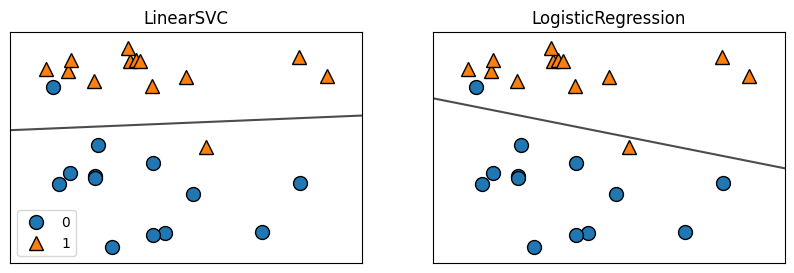

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression(max_iter=5000)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend()

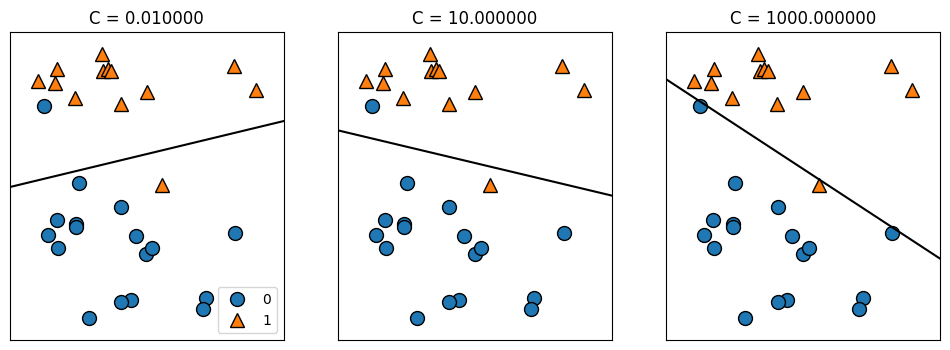

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

c 가 작음 -> 규제가 강함

c 가 크다 -> 규제가 약해짐

SVM 결과 그리기

In [ ]:
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])

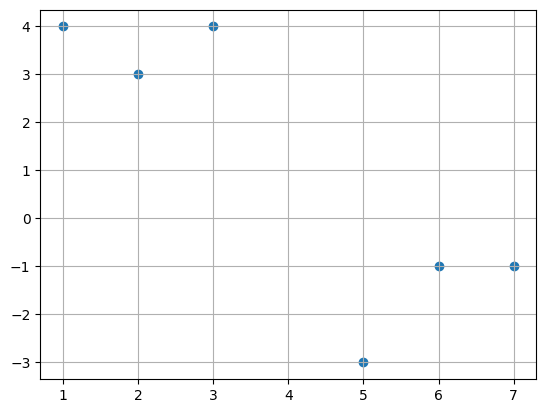

In [ ]:
plt.scatter(X[:,0], X[:, 1])
plt.grid()

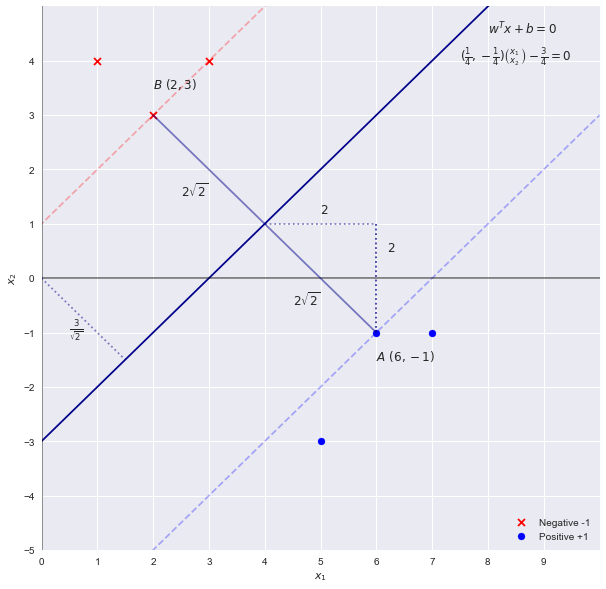

위 그림에서 가운데 직선만 생각했을때, 직관적으로

y = x - 3 을 유추 할 수 있다.

이 식을 위 그래프의 표기법대로 고치면

$$x_2 = x_1 -3 \\
\quad
\\
x_1 + (-1) \times x_2 - 3 = 0 \\
\quad \\
{1 \choose -1}^T {x_1 \choose x_2} - 3 = 0
\quad \\
\therefore \ w = (1, -1), \ \ b=-3
$$


$${\vec{w} \over |\vec{w}| } \cdot ( \vec{x}_+ - \vec{x}_-) =  {1 \over |\vec{w}|}(\vec{w} \cdot \vec{x}_+ - \vec{w} \cdot \vec{x}_-) = {2 \over |\vec{w}|} \quad : \quad margin $$

$$
{2 \over |\vec{w}|} = { 2 \over \sqrt 2} = \sqrt 2
$$